In [4]:
import numpy as np
import matplotlib.pyplot as plt

$\frac{\partial u}{\partial t} = D_u \frac{\partial ^2 u}{\partial x^2} + \alpha u - \beta u v$

$\frac{\partial v}{\partial t} = D_v \frac{\partial ^2 v}{\partial x^2} + \delta u v - \gamma v$

$u(x = 0, t) = v(x = L, t) = 0$

$u(x, t = 0) = (u_0, v_0)$ #This can change

$y = [u,v]^T$

$
A = 
\begin{bmatrix}
D_u L + \alpha I & 0 \\
0 & D_v L - \gamma I
\end{bmatrix}
$

$
g(y,t) = 
\begin{bmatrix}
-\beta(t) (u \odot v) \\
\delta(t) (u \odot v)
\end{bmatrix}
$

$f(y,t) = \dot y = Ay + g(y)$


In [ ]:
def A_matrix(n, D, multiplier, dx):
    A = np.eye(n) * -2.0 
    for i in range(n - 1):
        A[i, i+1] = 1.0
        A[i+1, i] = 1.0
    return A * D/dx**2 + multiplier * np.eye(n)

def step_iterator(y, f, delta_t, t):
    #setup with RK4, can change
    k1 = f(y, t)
    k2 = f(y + 0.5*delta_t*k1, t + delta_t/2)
    k3 = f(y + 0.5*delta_t*k2, t + delta_t/2)
    k4 = f(y + k3, t + delta_t)

    return y + (delta_t/6)*(k1 + 2*k2 + 2*k3 + k4)



def solve_lotka_volterra_IBVP(alpha, beta, delta, gamma, L, D_u, D_v, T, N, delta_t, y0):
    x = np.linspace(0, L, N + 1)   
    dx = x[1] - x[0]
    x_int = x[1:-1]

    M = len(x_int)

    def g(y, multiplier):
        return multiplier * y[0] * y[1]
    
    def f(y, t, dx=dx, alpha=alpha, beta=beta, delta=delta, gamma=gamma, D_u=D_u, D_v=D_v):
        A_u = A_matrix(len(y[0]), D_u, alpha, dx)
        A_v = A_matrix(len(y[1]), D_v, -gamma, dx)
        return (A_u@y[0] + g(y, -beta),A_v@y[1] + g(y, delta))

    U = [y0]
    u0, v0 = y0

    for n in range(int(T/delta_t)):
        u_n, v_n = U[-1]
        u_n1, v_n1 = U[-2]
        u_n_int = u_n[1:-1]
        v_n_int = v_n[1:-1]
        u_n1_int = u_n1[1:-1]
        v_n1_int = v_n1[1:-1]

        u_next, v_next = step_iterator((u_n_int, v_n_int), f, delta_t, n*delta_t)

        if not (np.all(np.isfinite(u_next)) and np.all(np.isfinite(v_next))):
            print("Blew up at step", n)
            break

        u_next = np.pad(u_next, 1, constant_values=0)
        v_next = np.pad(v_next, 1, constant_values=0)
        U.append((u_next, v_next))
    return U




In [75]:
def simp(n, dt):
    x = np.linspace(0, np.pi, n + 1)
    u0 = np.sin(x)
    v0 = 0.5*np.sin(x)
    U = solve_lotka_volterra_IBVP(alpha=1, beta=0.02, delta=0.02, gamma=1, L=np.pi, D_u=0.01, D_v=0.01, T=50, N=n, delta_t=dt, y0=(u0, v0))
    return np.array(U[-1][0]), np.array(U[-1][1])

n_orig = 1200
dt_orig = 0.01
x_orig = np.linspace(0, np.pi, n_orig+1)
u_test, v_test = simp(n_orig, dt_orig)
n_test = 750
dt_test = 0.01

n_plot = [900,750,600,450, 300, 150]
dt_plot = [0.015, 0.02, 0.025, 0.03, 0.04, 0.05]

n_errors = []
for n in n_plot:
    u, v = simp(n, dt_test)

    x_int = np.linspace(0, np.pi, n+1)
    
    u_int = np.interp(x_int, x_orig, u_test)
    v_int = np.interp(x_int, x_orig, v_test)

    error = np.linalg.norm(u_int - u)/np.linalg.norm(u_int) + np.linalg.norm(v_int - v)/np.linalg.norm(v_int)
    print(f"Error for n={n}, dt={dt_test}: {error}")
    n_errors.append(error)

u_store, v_store = u_test, v_test
x_int = np.linspace(0, np.pi, 750+1)
u_test = np.interp(x_int, x_orig, u_test)
v_test = np.interp(x_int, x_orig, v_test)

for dt in dt_plot:
    u, v = simp(n_test, dt)
    error = np.linalg.norm(u_test - u)/np.linalg.norm(u_test) + np.linalg.norm(v_test - v)/np.linalg.norm(v_test)
    print(f"Error for n={n_test}, dt={dt}: {error}")
    n_errors.append(error)



Error for n=900, dt=0.01: 0.00046013569678751476
Error for n=750, dt=0.01: 0.0009249651247770276
Error for n=600, dt=0.01: 0.0017857524852838685
Error for n=450, dt=0.01: 0.003628938259154114
Error for n=300, dt=0.01: 0.008886341886468876
Error for n=150, dt=0.01: 0.036618111646374296
Error for n=750, dt=0.015: 0.09856326158237083
Error for n=750, dt=0.02: 0.2256329159127711
Error for n=750, dt=0.025: 0.4177111154562979
Error for n=750, dt=0.03: 0.7380362517224834
Error for n=750, dt=0.04: 1.5231099072227432
Error for n=750, dt=0.05: 2.8601874671259893


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\aeron\AppData\Local\Temp\ipykernel_16476\2326826890.py:4: SyntaxWarning: invalid escape sequence '\D'
  ax[0].loglog(np.pi/n_plot, n_errors[:6], 'o-', label='$\Delta t = 0.01$')
C:\Users\aeron\AppData\Local\Temp\ipykernel_16476\2326826890.py:5: SyntaxWarning: invalid escape sequence '\D'
  ax[0].loglog(np.pi/n_plot, (100/n_plot)**2, '--', label='$O(\Delta x^2)$')
C:\Users\aeron\AppData\Local\Temp\ipykernel_16476\2326826890.py:6: SyntaxWarning: invalid escape sequence '\D'
  ax[0].se

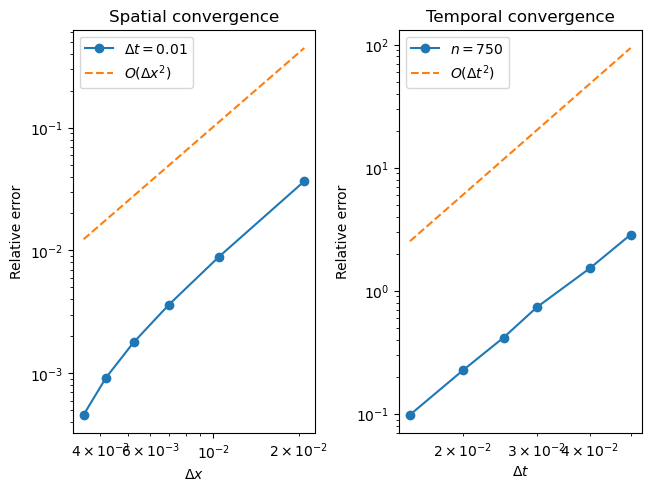

In [77]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)
n_plot = np.array(n_plot)
dt_plot = np.array(dt_plot)
ax[0].loglog(np.pi/n_plot, n_errors[:6], 'o-', label='$\Delta t = 0.01$')
ax[0].loglog(np.pi/n_plot, (100/n_plot)**2, '--', label='$O(\Delta x^2)$')
ax[0].set_xlabel('$\Delta x$')
ax[0].set_ylabel('Relative error')
ax[0].set_title('Spatial convergence')
ax[1].loglog(dt_plot, n_errors[6:], 'o-', label='$n=750$')
ax[1].loglog(dt_plot, 750000*dt_plot**3, '--', label='$O(\Delta t^2)$')
ax[1].set_xlabel('$\Delta t$')
ax[1].set_ylabel('Relative error')
ax[1].set_title('Temporal convergence')
ax[0].legend()
ax[1].legend()